<a href="https://colab.research.google.com/github/AtriSaxena/Tensorflow-2.X-Zero2Mastery/blob/main/05_transfer_learning_TF_Part2_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tensorflow learning with tensorflow part2: Fine Tuning 

In the previous video, We covered transfer learning feature extraction, now it's time to learn a new kind of transfer learning: fine tuning.

we will download `helper_function.py` to use functions. 
https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [ ]:
!nvidia-smi

Sat Nov 27 13:24:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-12-05 18:20:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-12-05 18:20:31 (76.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
#Import from helper_function.py 

from helper_functions import plot_loss_curves, unzip_data, create_tensorboard_callback, walk_through_dir 

## Lets get some Data 

This time we're going to see how we can use the pretrained models within `tf.keras.applications` and apply then to our own problem (recognizing images of foods)

https://www.tensorflow.org/api_docs/python/tf/keras/applications?version=nightly

In [ ]:
#Get 10% of training data of 10 classes. 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

unzip_data("10_food_classes_10_percent.zip")

--2021-11-27 13:24:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.181.128, 64.233.182.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.181.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   163MB/s    in 1.0s    

2021-11-27 13:24:52 (163 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [ ]:
#Create training and test directory paths 

train_dir = "10_food_classes_10_percent/train" 
test_dir = "10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32 

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory= train_dir, 
                                                                            label_mode = 'categorical', 
                                                                            image_size= IMAGE_SIZE, 
                                                                            batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir, 
                                                                label_mode = 'categorical', 
                                                                image_size = IMAGE_SIZE, 
                                                                batch_size = BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data_10_percent.take(1): 
  print(images, labels)

tf.Tensor(
[[[[8.13840942e+01 7.33840942e+01 7.13840866e+01]
   [8.76831894e+01 7.96831894e+01 7.76831894e+01]
   [8.71367950e+01 7.91367950e+01 7.65412903e+01]
   ...
   [1.14412003e+02 8.35593414e+01 8.04856720e+01]
   [1.15555786e+02 8.70000000e+01 8.30000000e+01]
   [1.15523750e+02 8.70000000e+01 8.30000000e+01]]

  [[8.09886780e+01 7.31607132e+01 6.96446075e+01]
   [7.18880692e+01 6.43005447e+01 6.00631332e+01]
   [7.45309372e+01 6.73911057e+01 6.18105888e+01]
   ...
   [1.20986458e+02 8.79969788e+01 8.29969788e+01]
   [1.20857590e+02 8.88888702e+01 8.38571472e+01]
   [1.19843910e+02 8.88703766e+01 8.38571472e+01]]

  [[7.45529327e+01 6.81957932e+01 5.95529327e+01]
   [7.49445190e+01 6.98974838e+01 6.08179207e+01]
   [7.91076202e+01 7.51076202e+01 6.56790543e+01]
   ...
   [1.23205223e+02 8.91473389e+01 8.01224899e+01]
   [1.25436691e+02 9.13490219e+01 8.35639038e+01]
   [1.25989311e+02 9.09709854e+01 8.40262985e+01]]

  ...

  [[1.70944626e+02 1.53944626e+02 1.34373154e+02]
   [1

## Experiments we will be doing 

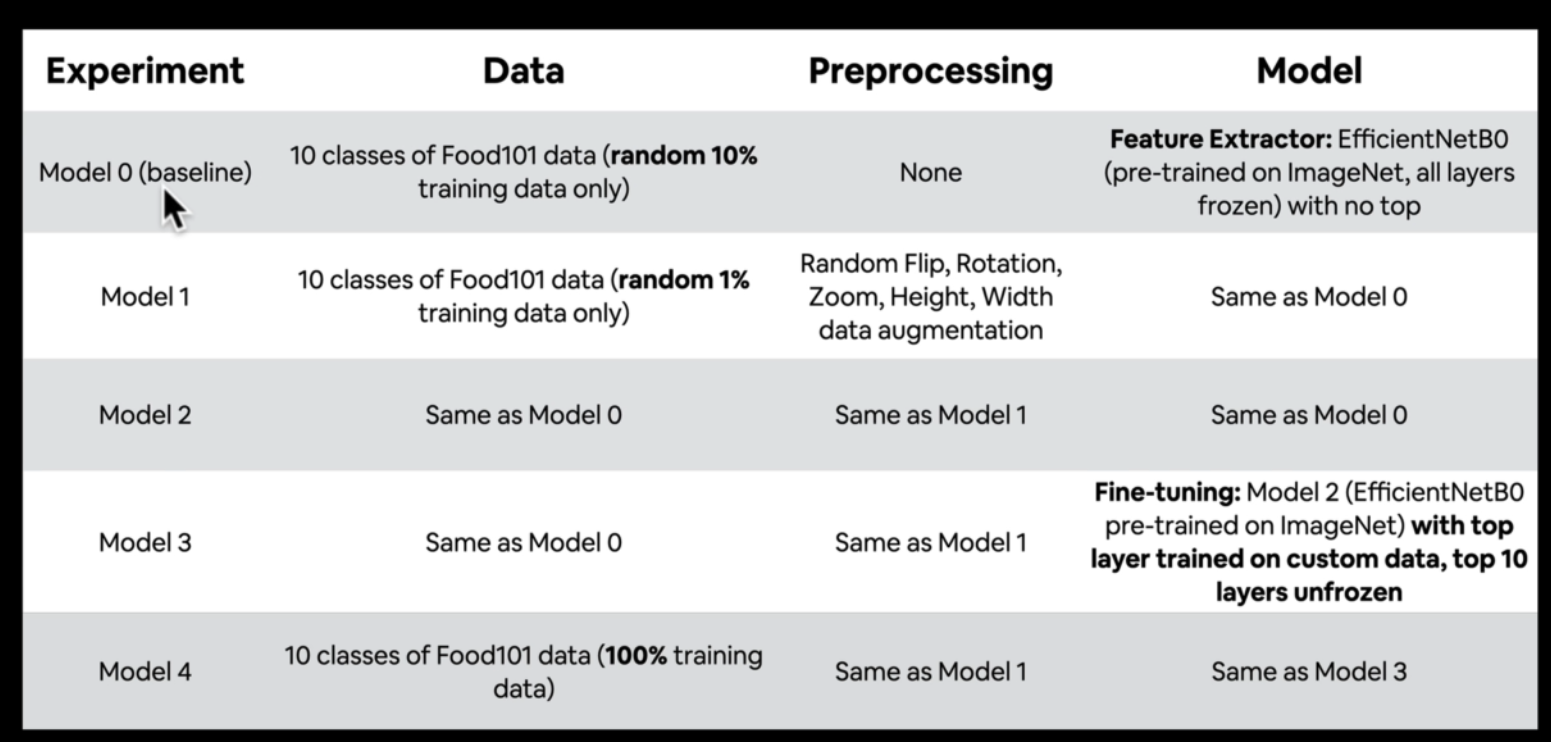

## Model 0: Building a tranfer learning model feature extraction using the keras functional API 

The sequential API is straight forward, it runs our layers in sequential order. 

But the functional API gives us more flexibility with our models

In [ ]:
#1. Create base line model with tf.keras.applications 

base_model = tf.keras.applications.EfficientNetB0(include_top = False)

#2. Freeze the base model( so the underlying pre-trained patterns aren't updated during training)
base_model.trainable = False 

#3. Create inputs into our model 
inputs = tf.keras.layers.Input(shape = (224,224,3) , name = "input_layer" )

#4. If using Resnet50V2 you will need to normalize inputs (Efficient has rescaling builtins)
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

#5. Pass the input to the base model 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

#6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer 
outputs = tf.keras.layers.Dense(10, activation="softmax", name= "output_layer")(x)

#8. Combine the inputs with the outputs into a model 
model_0 = tf.keras.Model(inputs, outputs)
 
#9 Compile the model 
model_0.compile(loss = "categorical_crossentropy", 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ["accuracy"])
 
#10 Fit the model and save the history
history_model0 = model_0.fit(train_data_10_percent, 
                             epochs=5, 
                             steps_per_epoch = len(train_data_10_percent),
                             validation_data = test_data, 
                             validation_steps = int(0.25 * len(test_data)),
                             callbacks= [create_tensorboard_callback(dir_name="transfer_learning", 
                                                                     experiment_name="10_percent_feature_extraction" ) ])

16719872/16705208 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20211127-132501
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - 27s 452ms/step - loss: 1.8868 - accuracy: 0.4147 - val_loss: 1.3520 - val_accuracy: 0.6990
Epoch 2/5
24/24 [==============================] - 7s 272ms/step - loss: 1.1500 - accuracy: 0.7200 - val_loss: 0.9326 - val_accuracy: 0.7796
Epoch 3/5
24/24 [==============================] - 9s 359ms/step - loss: 0.8320 - accuracy: 0.8200 - val_loss: 0.7684 - val_accuracy: 0.8174
Epoch 4/5
24/24 [==============================] - 7s 268ms/step - loss: 0.6794 - accuracy: 0.8440 - val_loss: 0.6622 - val_accuracy: 0.8289
Epoch 5/5
24/24 [==============================] - 9s 359ms/step - loss: 0.5955 - accuracy: 0.8667 - val_loss: 0.6191 - val_accuracy: 0.8289


In [ ]:
#Evaluate on full data
model_0.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 0.6194 - accuracy: 0.8364


[0.6193706393241882, 0.8363999724388123]

In [ ]:
for layer_number, layer in enumerate(base_model.layers): 
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [ ]:
#Summary of whole model 
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


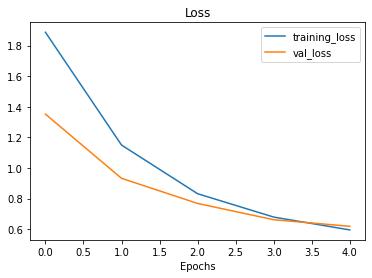

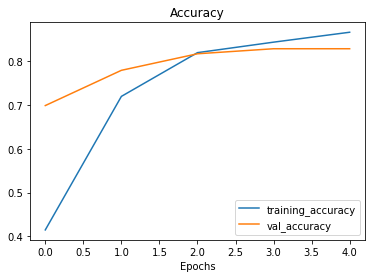

In [ ]:
#Check our loss curves 
plot_loss_curves(history_model0)

## Getting a feature vector from a trained model 

Let's demonstrate the Global Average pooling layer

We've a tensor after our model goes through `base_model` of shape (None,7,7, 1280) 

But then when it pass through GlobalAveragePooling2D, it turns into (None,1280). 

Let's use a similar shaped tensor of (1, 4, 4, 3) and then pass it to GlobalAveragePooling2D. 

In [ ]:
import tensorflow as tf


In [ ]:
#Define the input shape 
input_shape = (1, 4, 4, 3) 

#Create a random number 
tf.random.set_seed(42)
random_tensor = tf.random.normal(input_shape)
print(f"Random Input tensorf {random_tensor}")

#pass random tensor through GlobalAveragePooling2D 
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(random_tensor)
print(f"Global Average Pooled Tensor {global_average_pooled_tensor}")

Random Input tensorf [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]
Global Average Pooled Tensor [[-0.09368646 -0.45840448 -0.2885598 ]]


In [ ]:
#Let's replicate the GlobalAveragePooling2D layer

tf.reduce_mean(random_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

## Running a series of transfer learning Experiment 

We've seen the incredible results transfer learning can get with only 10% of the training data, but how does it go with 1% of the training data how about we set up a bunch of experiments to find out: 

1. `model_1` use feature extraction transfer learning with 1% of the training data with data augmentation. 
2. 'model_2' uses feature extraction transfer learning with 10% of the training data with data augmentation. 
3. `model_3` uses fine-tuning extraction transfer learning with 10% of the training data with data augmentation. 
4. `model_4` uses fine-tuning extraction transfer learning with 100% if the training data with data augmentation. 

🔑 **Note:** Throughout all experiments the same test dataset will be used to evaluate our model. This ensure consistency across evaluration metrics.  


In [ ]:
#Download and unzip data. 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip 

--2021-11-27 13:26:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 172.253.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   173MB/s    in 0.7s    

2021-11-27 13:26:19 (173 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
unzip_data("10_food_classes_1_percent.zip")

In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There a

In [ ]:
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test"

In [ ]:
#Setup data loaders 
import tensorflow as tf

IMAGE_SIZE = (224,224) 
BATCH_SIZE = 32 
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent, 
                                                                           label_mode = "categorical",
                                                                           image_size = IMAGE_SIZE, 
                                                                           batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, 
                                                                label_mode = "categorical", 
                                                                image_size = IMAGE_SIZE, 
                                                                batch_size = BATCH_SIZE) 


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation right into the Model 

To add the data augmentation right into our models, we can use the layers inside: 

* `tf.keras.layers.experimental.preprocessing()` - Use data augmentation within the model. 

We can see the benefits of doing this within the Tensorflow data augmentation doc: https://www.tensorflow.org/tutorials/images/data_augmentation#option_1_make_the_preprocessing_layers_part_of_your_model 

Benefits:

* Data augmentation will run on-device, synchronously with the rest of your layers, and benefit from GPU acceleration.

* When you export your model using model.save, the preprocessing layers will be saved along with the rest of your model. If you later deploy this model, it will automatically standardize images (according to the configuration of your layers). This can save you from the effort of having to reimplement that logic server-side.

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.layers.experimental import preprocessing

#Create data augmentation stage with horizontal flipping, rotations, zooms etc. 

data_augmentation = keras.Sequential([
            preprocessing.Resizing(224,224),
            preprocessing.RandomFlip("horizontal"), 
            preprocessing.RandomRotation(0.2),
            preprocessing.RandomZoom(0.2), 
            preprocessing.RandomHeight(0.2), 
            preprocessing.RandomWidth(0.2), 
            # preprocessing.Rescale(1./255)
], name="data_augmentation")

## Visualize our Data Augmentation layer(and see what happens to our data) 



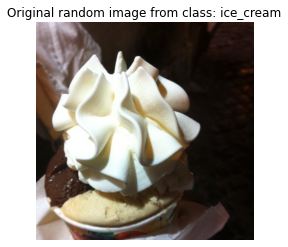

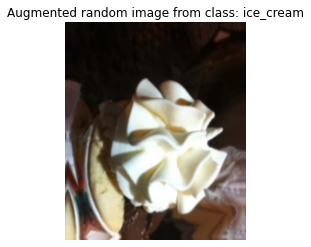

In [ ]:
#View a random image and compare it to its augmented version. 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os 
import random 

target_class = random.choice(train_data_1_percent.class_names) 
target_dir = "10_food_classes_1_percent/train/" + target_class 
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

#Read in the random image 
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); 

#Now let's plot our augmented random image
augmented_img = data_augmentation(tf.expand_dims(img,axis=0)) 
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) 
plt.title(f"Augmented random image from class: {target_class}") 
plt.axis(False);


## Model 1: Feature extraction Transfer learning with 1% of the data with data augmentation 

In [ ]:
#Setup input shape and base model, freezing the base model layer
input_shape = (224,224,3 )
base_model = tf.keras.applications.EfficientNetB0(include_top= False) 
base_model.trainable = False 

#Create input layer 
input_layer = tf.keras.layers.Input(shape= input_shape) 

#Create augmentation layer 
x = data_augmentation(input_layer) #Data augmentation as a layer

#create basemodel 
x = base_model(x, training=False) 

#Create pooling layer 
x = tf.keras.layers.GlobalAveragePooling2D(name="Global_Average_pooling")(x) 

#Output layer 
output_layer = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x) 

#Make a model using the inputs and outputs 
Model_1 = tf.keras.Model(input_layer, output_layer)

#Compile the model 
Model_1.compile(loss= "categorical_crossentropy", 
                metrics=['accuracy'],
                optimizer= tf.keras.optimizers.Adam()) 

Model_1_history = Model_1.fit(train_data_1_percent, 
                              epochs = 5, 
                              validation_data= test_data, 
                              steps_per_epoch = len(train_data_1_percent),
                              validation_steps = int(0.25 * len(test_data)),
                              callbacks = [create_tensorboard_callback(dir_name= "transfer_learning", 
                                                                        experiment_name = "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20211127-132626
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


3/3 [==============================] - 14s 3s/step - loss: 2.4151 - accuracy: 0.0714 - val_loss: 2.2340 - val_accuracy: 0.1727
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.1960 - accuracy: 0.2000 - val_loss: 2.1192 - val_accuracy: 0.2697
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9810 - accuracy: 0.3857 - val_loss: 2.0233 - val_accuracy: 0.3339
Epoch 4/5
3/3 [==============================] - 7s 3s/step - loss: 1.8030 - accuracy: 0.5857 - val_loss: 1.9362 - val_accuracy: 0.3882
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6882 - accuracy: 0.6714 - val_loss: 1.8740 - val_accuracy: 0.4260


In [ ]:
Model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Global_Average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [ ]:
Model_1.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 1.8502 - accuracy: 0.4360


[1.8501691818237305, 0.4359999895095825]

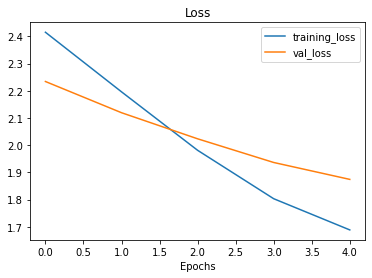

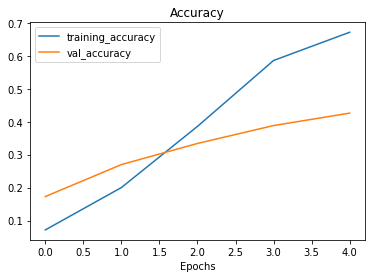

In [ ]:
plot_loss_curves(Model_1_history)

## Model 2: Feature extraction transfer learning with 10% of data and data augmentation. 


In [ ]:
#Get 10% of data. 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2021-11-27 13:27:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 142.250.159.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   177MB/s    in 0.9s    

2021-11-27 13:27:14 (177 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [ ]:
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

IMAGE_SIZE = (224,224)

In [ ]:
import tensorflow as tf

In [ ]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent, 
                                                                            label_mode = "categorical",
                                                                            image_size = IMAGE_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, 
                                                                label_mode = "categorical", 
                                                                image_size = IMAGE_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
#Create model 2 with data augmentation built in 

from tensorflow.keras import layers 
from tensorflow.keras.layers.experimental import preprocessing 
from tensorflow.keras.models import Sequential 

data_augmentation = Sequential([
    preprocessing.Resizing(224,224),
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2), 
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2),
], name = "data_augmentation"
)


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False, 
                                                  input_shape=(224,224,3), classes = 10) 
base_model.trainable = False

input = tf.keras.layers.Input(shape = (224,224,3))


x = data_augmentation(input)

x = base_model(x , training=False) #pass augmented images to base model but keep it in inference mode, This also ensures batchnorm layers don't get updated

x = layers.GlobalAveragePooling2D(name = "global_average_pooling")(x)

outputs = layers.Dense(10, activation= "softmax")(x)

model_2 = tf.keras.Model(input, outputs)

#Compile model  
model_2.compile(loss= "categorical_crossentropy", 
                metrics = ["accuracy"],
                optimizer = tf.keras.optimizers.Adam()) 

## Creating a Model Checkpoint callback 

The ModelCheckPoint callback intermediately saves our model(the full model or just the weights) during the training. This is useful so we can come and start where we left off. 

In [ ]:
#Set checkpoint paths 
checkpoint_path = "ten_percent_model_checkpoint_weights/checkpoint.ckpt" 

#Create a model checkpoint callback that saves the model's weight only 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                         monitor= 'val_loss', 
                                                         save_weights_only = True, 
                                                         save_best_only= False,
                                                         save_freq = "epoch",
                                                         verbose=1)

In [ ]:
model_2_history = model_2.fit(train_data_10_percent,
                              epochs=5,
                              validation_data=test_data,
                              validation_steps= int(0.25 * len(test_data)),
                              callbacks= [create_tensorboard_callback(dir_name="transfer_learning", 
                                                                      experiment_name = "10_percent_data_aug"), checkpoint_callback
                                          ])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20211127-132721
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - ETA: 0s - loss: 2.0071 - accuracy: 0.3240
Epoch 00001: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 26s 737ms/step - loss: 2.0071 - accuracy: 0.3240 - val_loss: 1.4955 - val_accuracy: 0.6562
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3695 - accuracy: 0.6693
Epoch 00002: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 15s 597ms/step - loss: 1.3695 - accuracy: 0.6693 - val_loss: 1.0616 - val_accuracy: 0.7549
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0686 - accuracy: 0.7373
Epoch 00003: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 15s 598ms/step - loss: 1.0686 - accuracy: 0.7373 - val_loss: 0.8671 - val_accuracy: 0.7829
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.9043 - accuracy: 0.7

In [ ]:
trained_model_weights= model_2.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 0.6987 - accuracy: 0.8096


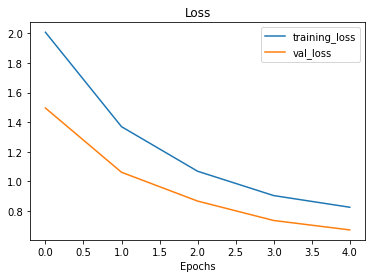

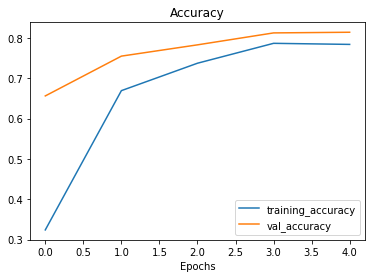

In [ ]:
plot_loss_curves(model_2_history)

## Loading in checkpoint weights

Loading in checkpointed weights returns a model to a specific checkpoint. 

In [ ]:
#Load in saved model weights and evaluate model 

model_2.load_weights(checkpoint_path)

In [ ]:
#Evaluate the model 
loaded_model_weights=model_2.evaluate(test_data)

79/79 [==============================] - 11s 131ms/step - loss: 0.6987 - accuracy: 0.8096


In [ ]:
import numpy as np 

np.isclose(np.array(trained_model_weights), np.array(loaded_model_weights))

array([ True,  True])

## Fine tuning an existing model on 10 % of data. 

> 🔑 **Note:** Fine tuning usually works best after training a feature extraction model for a few epochs with larger amounts of custom data. 


In [ ]:
for layer in model_2.layers: 
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f12bb98dd50> True
<keras.engine.sequential.Sequential object at 0x7f12bb93e410> True
<keras.engine.functional.Functional object at 0x7f12baadad10> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f12bba4ddd0> True
<keras.layers.core.dense.Dense object at 0x7f12bbb37590> True


In [ ]:
for layer_no, layer in enumerate(model_2.layers[2].layers): 
  print(layer_no, layer.name, layer.trainable)

0 input_4 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
#How many trainable variables are in our base model
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
#To begin fine tuning, lets start by setting the last 10 layers as trainable=True 
base_model.trainable = True 

#Freeze all layers except for last 10
for layer in base_model.layers[:-10]: 
  layer.trainable = False

#Recompile (We have to recompile our model) 
model_2.compile(loss= "categorical_crossentropy", 
                optimizer = tf.keras.optimizers.Adam(lr=0.0001),  #when fine-tuning you typically want to lower the learning rate by 10x
                metrics=["accuracy"])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


🔑 **Note**: When you are fine tuning it's best practice to lower your learning rate by some amount. How much? This is a hyperparameter you can tune. But a good rule of thumb is atleast 10x. 

In [ ]:
#How many trainable variables are in our base model
print(len(model_2.layers[2].trainable_variables))

10


In [ ]:
#Fine tune for another 5 epochs 
initial_epochs=5
fine_tune_epochs = initial_epochs + 5 

#Refit the model (same as model_2 except with more trainable layers)
model_2_finetune_history= model_2.fit(train_data_10_percent, 
            epochs = fine_tune_epochs, 
            steps_per_epoch = len(train_data_10_percent),
            validation_steps = int(0.25 * len(test_data)),
              validation_data = test_data, 
            initial_epoch = model_2_history.epoch[-1],
            callbacks= [create_tensorboard_callback(dir_name = "transfer_learning", experiment_name="10_percent_fine_tuning")
                        ]
            )

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tuning/20211127-132919


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 5/10
24/24 [==============================] - 27s 759ms/step - loss: 0.6915 - accuracy: 0.8013 - val_loss: 0.5050 - val_accuracy: 0.8339
Epoch 6/10
24/24 [==============================] - 14s 558ms/step - loss: 0.5549 - accuracy: 0.8267 - val_loss: 0.4922 - val_accuracy: 0.8289
Epoch 7/10
24/24 [==============================] - 15s 608ms/step - loss: 0.5213 - accuracy: 0.8440 - val_loss: 0.4560 - val_accuracy: 0.8421
Epoch 8/10
24/24 [==============================] - 14s 551ms/step - loss: 0.4519 - accuracy: 0.8720 - val_loss: 0.4483 - val_accuracy: 0.8405
Epoch 9/10
24/24 [==============================] - 13s 507ms/step - loss: 0.4107 - accuracy: 0.8893 - val_loss: 0.4279 - val_accuracy: 0.8487
Epoch 10/10
24/24 [==============================] - 14s 551ms/step - loss: 0.3623 - accuracy: 0.8973 - val_loss: 0.4635 - val_accuracy: 0.8257


In [ ]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 0.5028 - accuracy: 0.8240


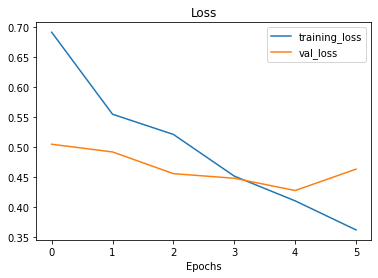

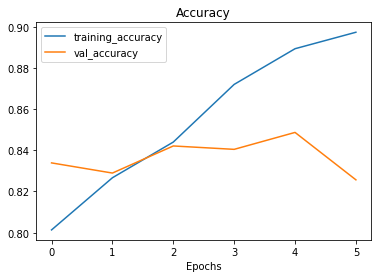

In [ ]:
plot_loss_curves(model_2_finetune_history)

The `plot_loss_curves()` function works great with models which have only been fit once, however, we want something to compare one series of running `fit()` with another (e.g. before and after fine tuning) 

In [ ]:
import matplotlib.pyplot as plt

#Let's create a function to compare training histories
def compare_history(original_history, new_history, initial_epochs =5): 
  """
  Compare two tensorflow history objects

  """
  #Get original history measurements 
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  #Combine original history 
  total_acc = acc+ new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  #Make plot for accuracy
  plt.figure(figsize = (8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label="Training accuracy")
  plt.plot(total_val_acc, label = "Validation_accuracy") 
  plt.plot([initial_epochs-1, initial_epochs-1],plt.ylim(), label ="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  #Make plot for loss 
  plt.figure(figsize = (8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss, label="Training loss")
  plt.plot(total_val_loss, label = "Validation_loss") 
  plt.plot([initial_epochs-1, initial_epochs-1],plt.ylim(), label ="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation loss")

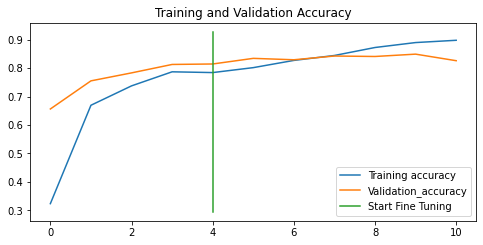

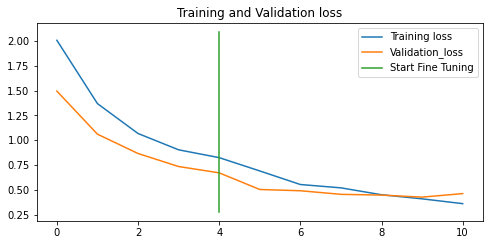

In [ ]:
compare_history(model_2_history, model_2_finetune_history,initial_epochs=5)

# Fine tuning existing Model on all of the Data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
unzip_data("10_food_classes_all_data.zip")

--2021-11-27 13:31:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 108.177.121.128, 142.250.103.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   178MB/s    in 2.8s    

2021-11-27 13:31:19 (178 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.

In [ ]:
train_dir_all = "10_food_classes_all_data/train"
test_dir_all = "10_food_classes_all_data/test"
IMAGE_SIZE = (224,224) 
BATCH_SIZE=32 

In [ ]:
#setup data inputs 
import tensorflow as tf 

train_data_all = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all, 
                                                                     label_mode = "categorical", 
                                                                     image_size = IMAGE_SIZE) 

test_data_all = tf.keras.preprocessing.image_dataset_from_directory(test_dir_all, 
                                                                    label_mode= "categorical", 
                                                                    image_size = IMAGE_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
results_fine_tune_10_percent

[0.5028285980224609, 0.8240000009536743]

To train a fine-tuning model(model_4) we need to revert model_2 back to its feature extraction weights 

In [ ]:
#Load weights from checkpoint, that we can finetune from the same stage 
#the 10 percent data model was fine tune from 

model_2.load_weights(checkpoint_path)


In [ ]:
#Lets evaluate model_2 now 

model_2.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 0.6987 - accuracy: 0.8096


[0.6987005472183228, 0.8095999956130981]

In [ ]:
#check to see if our model is reverted back to feature extraction results 
loaded_model_weights

[0.6987006068229675, 0.8095999956130981]

Great, we have loaded our model weights from model_2.

In [ ]:
#Check which layers are trainable in model_2
for layer_number, layer in enumerate(model_2.layers): 
  print(layer_number, layer.name, layer.trainable)

0 input_5 True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling True
4 dense True


In [ ]:
for layer_number, layer in enumerate(model_2.layers[2].layers): 
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
#Compile 
model_2.compile(loss= "categorical_crossentropy", 
                metrics=["accuracy"],
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001))


In [ ]:
#Fit model 
fine_tune_epochs = initial_epochs + 5

model_2_finetune_all_data = model_2.fit(train_data_all, 
                                        epochs= fine_tune_epochs, 
                                        steps_per_epoch = len(train_data_all), 
                                        validation_steps=int(0.25 * len(test_data_all)),
                                        validation_data = test_data_all, 
                                        initial_epoch= model_2_history.epoch[-1],
                                        callbacks= [create_tensorboard_callback(dir_name="transfer_learning", 
                                                                                experiment_name="full_10_classes_fine_tuning_last_10")]
                                        )

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tuning_last_10/20211127-133140
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


235/235 [==============================] - 92s 353ms/step - loss: 0.7379 - accuracy: 0.7657 - val_loss: 0.3846 - val_accuracy: 0.8651
Epoch 6/10
235/235 [==============================] - 72s 304ms/step - loss: 0.5970 - accuracy: 0.8073 - val_loss: 0.3841 - val_accuracy: 0.8684
Epoch 7/10
235/235 [==============================] - 70s 297ms/step - loss: 0.5412 - accuracy: 0.8287 - val_loss: 0.3591 - val_accuracy: 0.8750
Epoch 8/10
235/235 [==============================] - 68s 285ms/step - loss: 0.4862 - accuracy: 0.8463 - val_loss: 0.3735 - val_accuracy: 0.8734
Epoch 9/10
235/235 [==============================] - 64s 270ms/step - loss: 0.4511 - accuracy: 0.8569 - val_loss: 0.3380 - val_accuracy: 0.8947
Epoch 10/10
235/235 [==============================] - 60s 253ms/step - loss: 0.4201 - accuracy: 0.8631 - val_loss: 0.3264 - val_accuracy: 0.8980


In [ ]:
#Let's evaluate
results_fine_tune_full_data = model_2.evaluate(test_data_all)
results_fine_tune_full_data

79/79 [==============================] - 11s 131ms/step - loss: 0.3205 - accuracy: 0.8956


[0.3205210268497467, 0.8956000208854675]

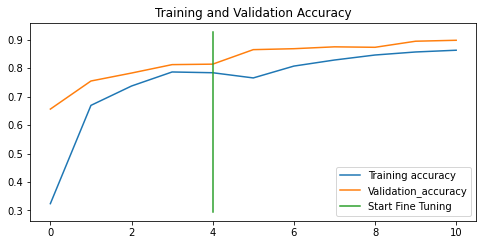

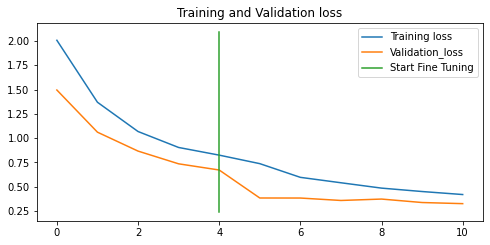

In [ ]:
compare_history(original_history=model_2_history, new_history = model_2_finetune_all_data, initial_epochs=5)